## Import library & Dataset

In [28]:
import pandas as pd # untuk membuat data frame
import numpy as np # untuk membuat array
import matplotlib.pyplot as plt # untuk membuat grafik
import seaborn as sns # untuk membuat grafik
import warnings # untuk menghindari warning
warnings.filterwarnings('ignore') # untuk menghindari warning

In [29]:
# load dataset
df = pd.read_csv('data.csv')

# melihat dataset (5 teratas)
df.head()

,name,date_of_event,age,citizenship,event_location,event_location_district,event_location_region,date_of_death,gender,took_part_in_the_hostilities,place_of_residence,place_of_residence_district,type_of_injury,ammunition,killed_by,notes
0,'Abd a-Rahman Suleiman Muhammad Abu Daghash,2023-09-24,32.0,Palestinian,Nur Shams R.C.,Tulkarm,West Bank,2023-09-24,M,NaN,Nur Shams R.C.,Tulkarm,gunfire,live ammunition,Israeli security forces,Fatally shot by Israeli forces while standing ...
1,Usayed Farhan Muhammad 'Ali Abu 'Ali,2023-09-24,21.0,Palestinian,Nur Shams R.C.,Tulkarm,West Bank,2023-09-24,M,NaN,Nur Shams R.C.,Tulkarm,gunfire,live ammunition,Israeli security forces,Fatally shot by Israeli forces while trying to...
2,'Abdallah 'Imad Sa'ed Abu Hassan,2023-09-22,16.0,Palestinian,Kfar Dan,Jenin,West Bank,2023-09-22,M,NaN,al-Yamun,Jenin,gunfire,live ammunition,Israeli security forces,Fatally shot by soldiers while firing at them ...
3,Durgham Muhammad Yihya al-Akhras,2023-09-20,19.0,Palestinian,'Aqbat Jaber R.C.,Jericho,West Bank,2023-09-20,M,NaN,'Aqbat Jaber R.C.,Jericho,gunfire,live ammunition,Israeli security forces,Shot in the head by Israeli forces while throw...
4,Raafat 'Omar Ahmad Khamaisah,2023-09-19,15.0,Palestinian,Jenin R.C.,Jenin,West Bank,2023-09-19,M,NaN,Jenin,Jenin,gunfire,live ammunition,Israeli security forces,Wounded by soldiers’ gunfire after running awa...


## Dropping Unnecessary column

In [30]:
df.drop('name', axis=1, inplace=True) # axis=1 untuk kolom, axis=0 untuk baris

In [31]:
df.head()

,date_of_event,age,citizenship,event_location,event_location_district,event_location_region,date_of_death,gender,took_part_in_the_hostilities,place_of_residence,place_of_residence_district,type_of_injury,ammunition,killed_by,notes
0,2023-09-24,32.0,Palestinian,Nur Shams R.C.,Tulkarm,West Bank,2023-09-24,M,NaN,Nur Shams R.C.,Tulkarm,gunfire,live ammunition,Israeli security forces,Fatally shot by Israeli forces while standing ...
1,2023-09-24,21.0,Palestinian,Nur Shams R.C.,Tulkarm,West Bank,2023-09-24,M,NaN,Nur Shams R.C.,Tulkarm,gunfire,live ammunition,Israeli security forces,Fatally shot by Israeli forces while trying to...
2,2023-09-22,16.0,Palestinian,Kfar Dan,Jenin,West Bank,2023-09-22,M,NaN,al-Yamun,Jenin,gunfire,live ammunition,Israeli security forces,Fatally shot by soldiers while firing at them ...
3,2023-09-20,19.0,Palestinian,'Aqbat Jaber R.C.,Jericho,West Bank,2023-09-20,M,NaN,'Aqbat Jaber R.C.,Jericho,gunfire,live ammunition,Israeli security forces,Shot in the head by Israeli forces while throw...
4,2023-09-19,15.0,Palestinian,Jenin R.C.,Jenin,West Bank,2023-09-19,M,NaN,Jenin,Jenin,gunfire,live ammunition,Israeli security forces,Wounded by soldiers’ gunfire after running awa...


In [32]:
# Melihat informasi dataset
print(f'Jumlah records/baris & features/kolom di dataset adalah {df.shape}')
print(f'Jumlah data duplikat: {df.duplicated().sum()}')
print(f'Jumlah data yang hilang: {df.isna().sum().sum()}')

Jumlah records/baris & features/kolom di dataset adalah (11124, 15)
Jumlah data duplikat: 360
Jumlah data yang hilang: 7539


Dari output yang kita lihat, terlihat bahwa ada 7 data duplikat dan 7500+ data yang hilang. Dengan ini kita akan menghandle data duplikat saja

In [33]:
# menghilangkan data duplikat
df.drop_duplicates(keep='first', inplace=True)

print(f'Jumlah records/baris & features/kolom di dataset adalah {df.shape}')
print(f'Jumlah data duplikat: {df.duplicated().sum()}')

Jumlah records/baris & features/kolom di dataset adalah (10764, 15)
Jumlah data duplikat: 0


Melihat data yang missing

In [34]:
print(df.isna().sum().sort_values(ascending=False))

ammunition                      5036
took_part_in_the_hostilities    1354
notes                            272
type_of_injury                   261
age                              114
place_of_residence                61
place_of_residence_district       61
gender                            14
date_of_event                      0
citizenship                        0
event_location                     0
event_location_district            0
event_location_region              0
date_of_death                      0
killed_by                          0
dtype: int64


- Dari 16 fitur yang kami miliki di dataset kami, 8 fitur mengandung nilai yang hilang. 
- Di antaranya, fitur `ammunition` dan `took_part_in_the_hostilities` memiliki jumlah nilai yang hilang paling banyak.
- Kita akan mempertahankan nilai yang hilang sebagaimana adanya, dan melanjutkan analisis kita.

## Dealing with missing values

In [35]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 10764 entries, 0 to 11123
Data columns (total 15 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   date_of_event                 10764 non-null  object 
 1   age                           10650 non-null  float64
 2   citizenship                   10764 non-null  object 
 3   event_location                10764 non-null  object 
 4   event_location_district       10764 non-null  object 
 5   event_location_region         10764 non-null  object 
 6   date_of_death                 10764 non-null  object 
 7   gender                        10750 non-null  object 
 8   took_part_in_the_hostilities  9410 non-null   object 
 9   place_of_residence            10703 non-null  object 
 10  place_of_residence_district   10703 non-null  object 
 11  type_of_injury                10503 non-null  object 
 12  ammunition                    5728 non-null   object 
 13  killed

Ammunition

In [36]:
df['ammunition'].value_counts()

ammunition
missile                        2789
live ammunition                1496
shell                           657
explosive belt                  316
bomb                            241
mortar fire                      50
knife                            37
flechette shells                 22
rubber-coated metal bullets      19
0.22-caliber bullets             16
phosphorus shell                 16
Qassam rocket                    15
car bomb                         15
teargas canister                 13
rocket                           12
grad rocket                       7
sponge rounds                     2
grenade                           2
flare bomb                        1
stun grenade                      1
rock                              1
Name: count, dtype: int64

In [37]:
df['ammunition'].fillna('Unknown', inplace=True)

print(df['ammunition'].value_counts())

ammunition
Unknown                        5036
missile                        2789
live ammunition                1496
shell                           657
explosive belt                  316
bomb                            241
mortar fire                      50
knife                            37
flechette shells                 22
rubber-coated metal bullets      19
0.22-caliber bullets             16
phosphorus shell                 16
Qassam rocket                    15
car bomb                         15
teargas canister                 13
rocket                           12
grad rocket                       7
sponge rounds                     2
grenade                           2
flare bomb                        1
stun grenade                      1
rock                              1
Name: count, dtype: int64


Place of residence & Place of residence district

In [38]:
df['place_of_residence'].fillna('Unknown', inplace=True)
df['place_of_residence_district'].fillna('Unknown', inplace=True)

Type of injury

In [39]:
df['type_of_injury'].fillna('Unknown', inplace=True)

In [40]:
print(df.isna().sum().sort_values(ascending=False))

took_part_in_the_hostilities    1354
notes                            272
age                              114
gender                            14
date_of_event                      0
citizenship                        0
event_location                     0
event_location_district            0
event_location_region              0
date_of_death                      0
place_of_residence                 0
place_of_residence_district        0
type_of_injury                     0
ammunition                         0
killed_by                          0
dtype: int64


## Kolom Date

In [41]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 10764 entries, 0 to 11123
Data columns (total 15 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   date_of_event                 10764 non-null  object 
 1   age                           10650 non-null  float64
 2   citizenship                   10764 non-null  object 
 3   event_location                10764 non-null  object 
 4   event_location_district       10764 non-null  object 
 5   event_location_region         10764 non-null  object 
 6   date_of_death                 10764 non-null  object 
 7   gender                        10750 non-null  object 
 8   took_part_in_the_hostilities  9410 non-null   object 
 9   place_of_residence            10764 non-null  object 
 10  place_of_residence_district   10764 non-null  object 
 11  type_of_injury                10764 non-null  object 
 12  ammunition                    10764 non-null  object 
 13  killed

In [42]:
df['date_of_event']

0        2023-09-24
1        2023-09-24
2        2023-09-22
3        2023-09-20
4        2023-09-19
            ...    
11119    2000-10-19
11120    2000-10-17
11121    2000-10-07
11122    2000-10-07
11123    2000-10-02
Name: date_of_event, Length: 10764, dtype: object

In [43]:
df['date_of_death']

0        2023-09-24
1        2023-09-24
2        2023-09-22
3        2023-09-20
4        2023-09-19
            ...    
11119    2000-10-19
11120    2000-10-17
11121    2000-10-07
11122    2000-10-07
11123    2000-10-02
Name: date_of_death, Length: 10764, dtype: object

In [44]:
print(f'Tipe data date_of_event: {df["date_of_event"].dtype}')
print(f'Tipe data date_of_death: {df["date_of_death"].dtype}')

# konversi ke datetime
df['date_of_event'] = pd.to_datetime(df['date_of_event'])
df['date_of_death'] = pd.to_datetime(df['date_of_death'])

## Let's convert 'date_of_event' and 'date_of_death' to datetime format
df['event_year'] = pd.to_datetime(df['date_of_event']).dt.year
df['event_month'] = pd.to_datetime(df['date_of_event']).dt.month
df['event_day'] = pd.to_datetime(df['date_of_event']).dt.day

df['death_date'] = pd.to_datetime(df['date_of_death']).dt.date
df['death_year'] = pd.to_datetime(df['date_of_death']).dt.year
df['death_month'] = pd.to_datetime(df['date_of_death']).dt.month
df['death_day'] = pd.to_datetime(df['date_of_death']).dt.day

print()
print(f'Tipe data date_of_event: {df["date_of_event"].dtype}')
print(f'Tipe data date_of_death: {df["date_of_death"].dtype}')

Tipe data date_of_event: object
Tipe data date_of_death: object

Tipe data date_of_event: datetime64[ns]
Tipe data date_of_death: datetime64[ns]


In [45]:
df['date_of_death']

0       2023-09-24
1       2023-09-24
2       2023-09-22
3       2023-09-20
4       2023-09-19
           ...    
11119   2000-10-19
11120   2000-10-17
11121   2000-10-07
11122   2000-10-07
11123   2000-10-02
Name: date_of_death, Length: 10764, dtype: datetime64[ns]

## Analysis

In [46]:
df.describe()

,date_of_event,age,date_of_death,event_year,event_month,event_day,death_year,death_month,death_day
count,10764,10650.000000,10764,10764.000000,10764.000000,10764.000000,10764.000000,10764.000000,10764.000000
mean,2009-11-22 21:29:45.953177344,26.864601,2009-11-25 22:59:15.852842752,2009.409513,6.353772,15.544593,2009.418432,6.346711,15.559272
min,2000-10-02 00:00:00,1.000000,2000-10-02 00:00:00,2000.000000,1.000000,1.000000,2000.000000,1.000000,1.000000
25%,2004-05-19 00:00:00,19.000000,2004-05-20 00:00:00,2004.000000,3.000000,7.000000,2004.000000,3.000000,7.000000
50%,2009-01-03 00:00:00,23.000000,2009-01-03 00:00:00,2009.000000,7.000000,16.000000,2009.000000,7.000000,16.000000
75%,2014-07-26 00:00:00,32.000000,2014-07-27 00:00:00,2014.000000,9.000000,23.000000,2014.000000,9.000000,23.000000
max,2023-09-24 00:00:00,112.000000,2023-09-24 00:00:00,2023.000000,12.000000,31.000000,2023.000000,12.000000,31.000000
std,NaN,13.919381,NaN,6.033670,3.416119,9.072215,6.033181,3.414939,9.070226


In [47]:
df.describe(include='all')


,date_of_event,age,citizenship,event_location,event_location_district,event_location_region,date_of_death,gender,took_part_in_the_hostilities,place_of_residence,...,ammunition,killed_by,notes,event_year,event_month,event_day,death_date,death_year,death_month,death_day
count,10764,10650.000000,10764,10764,10764,10764,10764,10750,9410,10764,...,10764,10764,10492,10764.000000,10764.000000,10764.000000,10764,10764.000000,10764.000000,10764.000000
unique,NaN,NaN,4,494,20,3,NaN,2,5,581,...,22,3,6744,NaN,NaN,NaN,2593,NaN,NaN,NaN
top,NaN,NaN,Palestinian,Gaza City,Gaza,Gaza Strip,NaN,M,No,Gaza city,...,Unknown,Israeli security forces,"Killed during ""Operation Defensive Shield.""",NaN,NaN,NaN,2008-12-27,NaN,NaN,NaN
freq,NaN,NaN,9749,2108,2302,7457,NaN,9349,4560,2153,...,5036,9658,87,NaN,NaN,NaN,271,NaN,NaN,NaN
mean,2009-11-22 21:29:45.953177344,26.864601,NaN,NaN,NaN,NaN,2009-11-25 22:59:15.852842752,NaN,NaN,NaN,...,NaN,NaN,NaN,2009.409513,6.353772,15.544593,NaN,2009.418432,6.346711,15.559272
min,2000-10-02 00:00:00,1.000000,NaN,NaN,NaN,NaN,2000-10-02 00:00:00,NaN,NaN,NaN,...,NaN,NaN,NaN,2000.000000,1.000000,1.000000,NaN,2000.000000,1.000000,1.000000
25%,2004-05-19 00:00:00,19.000000,NaN,NaN,NaN,NaN,2004-05-20 00:00:00,NaN,NaN,NaN,...,NaN,NaN,NaN,2004.000000,3.000000,7.000000,NaN,2004.000000,3.000000,7.000000
50%,2009-01-03 00:00:00,23.000000,NaN,NaN,NaN,NaN,2009-01-03 00:00:00,NaN,NaN,NaN,...,NaN,NaN,NaN,2009.000000,7.000000,16.000000,NaN,2009.000000,7.000000,16.000000
75%,2014-07-26 00:00:00,32.000000,NaN,NaN,NaN,NaN,2014-07-27 00:00:00,NaN,NaN,NaN,...,NaN,NaN,NaN,2014.000000,9.000000,23.000000,NaN,2014.000000,9.000000,23.000000
max,2023-09-24 00:00:00,112.000000,NaN,NaN,NaN,NaN,2023-09-24 00:00:00,NaN,NaN,NaN,...,NaN,NaN,NaN,2023.000000,12.000000,31.000000,NaN,2023.000000,12.000000,31.000000


### Univariate Analysis

#### Fatalities data by year, month, day of the month

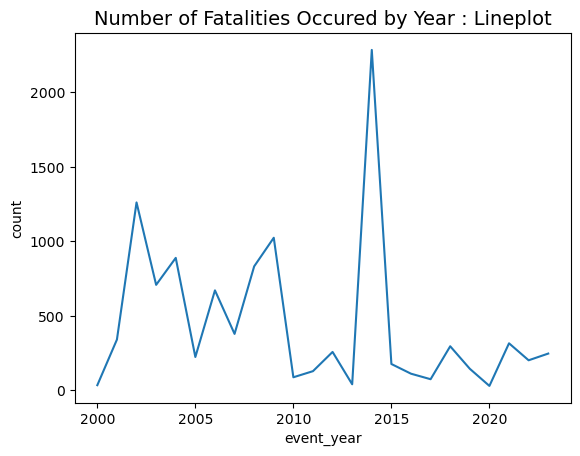

In [48]:
plt.title('Number of Fatalities Occured by Year : Lineplot', fontsize = 14)
sns.lineplot(df['event_year'].value_counts().sort_values(),linewidth = 1.5)
plt.show()

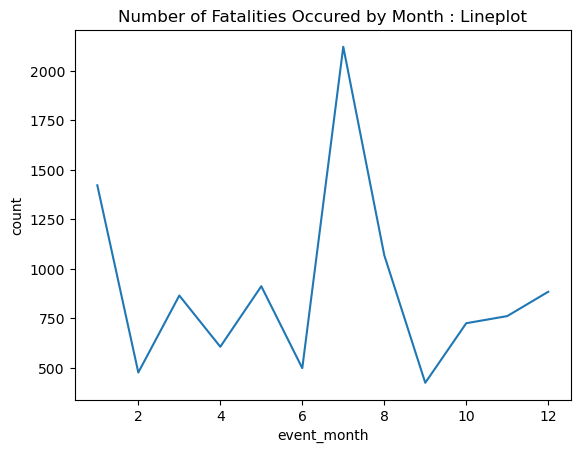

In [49]:
plt.title('Number of Fatalities Occured by Month : Lineplot')
sns.lineplot(df['event_month'].value_counts().sort_values())
plt.show()

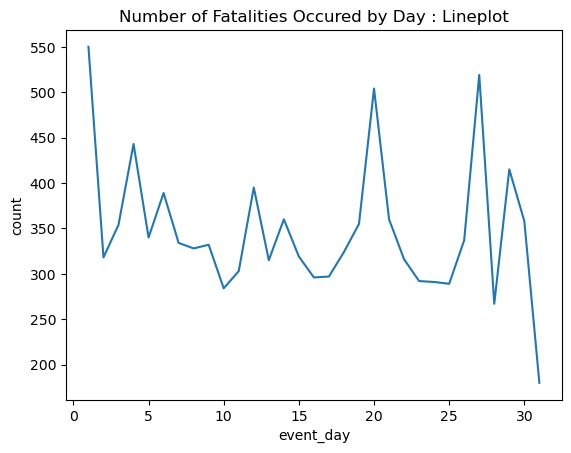

In [50]:
plt.title('Number of Fatalities Occured by Day : Lineplot')
sns.lineplot(df['event_day'].value_counts().sort_values())
plt.show()

**Insights**:
- Seperti yang Anda lihat, beberapa korban jiwa terjadi selama tahun 2014. 
- Pencarian Google memberi tahu Anda bahwa hal ini disebabkan oleh Perang Gaza 2014, yang terjadi selama bulan Juli dan Agustus.

#### Fatalities by Age, Fatalities by Region, Fatalities by Gender, Fatalities by Citizenship

Color Palette

In [51]:
my_col = ('#40E0D0', '#D2B48C','#c7e9b4', '#EEE8AA','#00FFFF','#FAEBD7','#FF6347', '#FAFAD2', '#E0EEEE', '#C1CDCD', '#838B8B', '#D8BFD8','#F4A460','#F08080', '#EE82EE', '#4682B4','#6A5ACD', '#00C78C', '#FFB6C1', '#8B5F65')

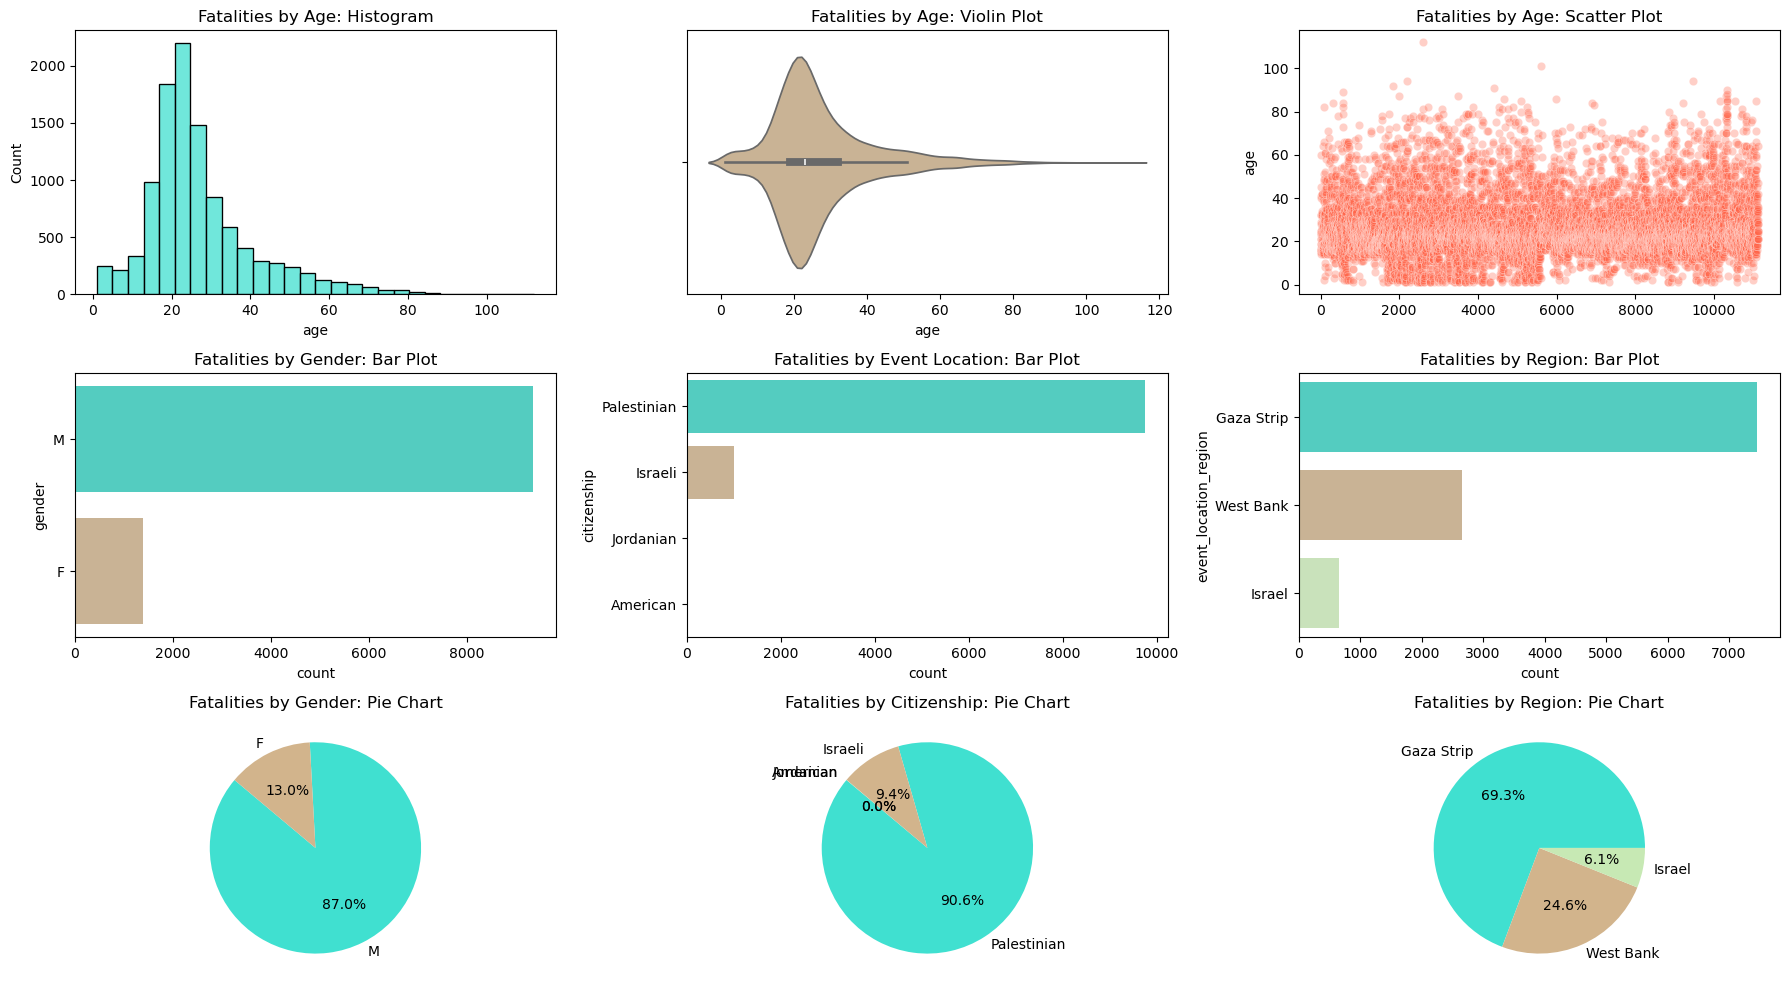

In [52]:
# Create a figure with 3 columns and 2 rows of subplots
fig, axes = plt.subplots(3, 3, figsize=(18, 10))

# Plot 1: Fatalities by Age (Histogram)
sns.histplot(df['age'], color="#40E0D0", bins=28, ax=axes[0, 0])
axes[0, 0].set_title('Fatalities by Age: Histogram')

# Plot 2: Fatalities by Age (Violin Plot)
sns.violinplot(df['age'], color="#D2B48C", orient='h', ax=axes[0, 1])
axes[0, 1].set_title('Fatalities by Age: Violin Plot')

# Plot 3: Fatalities by Age (Scatter Plot)
sns.scatterplot(df['age'], color="#FF6347", alpha=0.3, ax=axes[0, 2])
axes[0, 2].set_title('Fatalities by Age: Scatter Plot')

# Plot 4: Fatalities by Gender (Bar Plot)
sns.countplot(df['gender'], color="#40E0D0", 
              order=df['gender'].value_counts().index, palette=my_col, ax=axes[1, 0])
axes[1, 0].set_title('Fatalities by Gender: Bar Plot')

# Plot 5: Fatalities by Event Location (Bar Plot)
sns.countplot(df['citizenship'], 
              order=df['citizenship'].value_counts().index, palette=my_col, ax=axes[1, 1])
axes[1, 1].set_title('Fatalities by Event Location: Bar Plot')


# Plot 6: Fatalities by Region (Bar Plot)
sns.countplot(df['event_location_region'], 
              order=df['event_location_region'].value_counts().index, palette=my_col, ax=axes[1, 2])
axes[1, 2].set_title('Fatalities by Region: Bar Plot')


# Plot 7: Fatalities by Gender (Pie Chart)
gender_counts = df['gender'].value_counts()
axes[2, 0].pie(gender_counts, labels=gender_counts.index, autopct='%1.1f%%', colors=my_col, startangle=140)
axes[2, 0].set_title('Fatalities by Gender: Pie Chart')


# Plot 8: Fatalities by Citizenship (Pie Chart)
citizenship_counts = df['citizenship'].value_counts()
axes[2, 1].pie(citizenship_counts, labels=citizenship_counts.index, autopct='%1.1f%%', colors=my_col,startangle=140)
axes[2, 1].set_title('Fatalities by Citizenship: Pie Chart')

# Plot 9: Fatalities by Region (Pie Chart)
event_location_counts = df['event_location_region'].value_counts()
axes[2, 2].pie(event_location_counts, labels=event_location_counts.index, colors=my_col, autopct='%1.1f%%',)
axes[2, 2].set_title('Fatalities by Region: Pie Chart')

plt.tight_layout()
plt.show()

**Insights**:
- Berdasarkan usia, orang-orang yang berusia dari akhir remaja hingga akhir 20-an adalah yang paling tinggi jumlahnya, dalam hal jumlah korban jiwa secara keseluruhan.
- Secara khusus, kematian orang-orang berusia 18-24 tahun adalah yang tertinggi.
- Berdasarkan jenis kelamin, lebih banyak laki-laki yang meninggal, mewakili sekitar 87% dari keseluruhan kematian.
- Berdasarkan kewarganegaraan, lebih banyak warga Palestina yang meninggal, sekitar 91% dari seluruh korban jiwa.
- Berdasarkan lokasi kejadian, Gaza Strip memiliki jumlah korban jiwa tertinggi, diikuti oleh West Bank. 

#### Analysis by "Event Location District" & "Event Location Region"

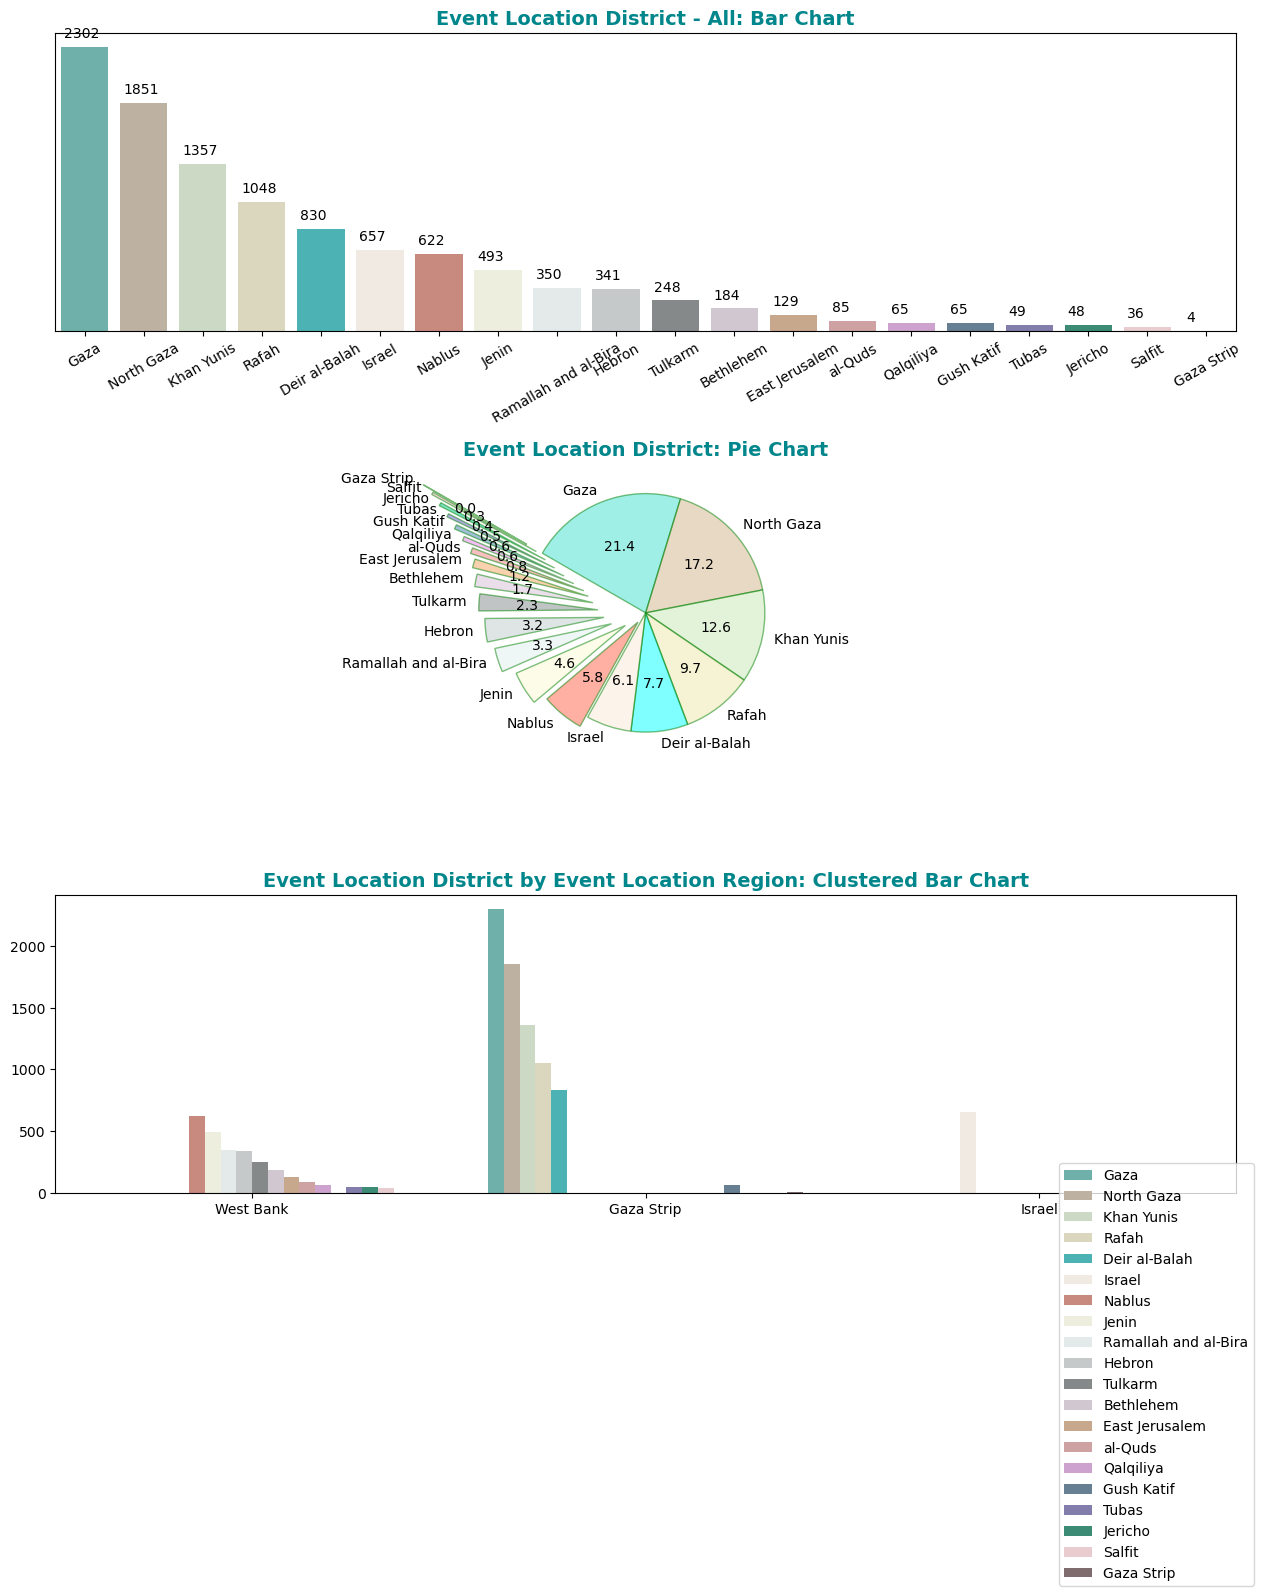

In [53]:
# Set the overall size of the figure
fig, axs = plt.subplots(3, 1, figsize=(13, 16))  # 3 rows, 1 column

# --- Subplot 1: Bar Chart of Event Location District ---
axs[0].set_title('Event Location District - All: Bar Chart', 
                  color='#00868B', weight='bold', fontsize=14)

ax = sns.countplot(x=df['event_location_district'], 
                   palette=my_col, saturation=0.4, 
                   order=df['event_location_district'].value_counts().index, 
                   ax=axs[0])  # Pass the axes object

# Add the count numbers on top of each bar
for p in ax.patches:
    axs[0].annotate('{:.0f}'.format(p.get_height()), 
                     (p.get_x() + 0.05, p.get_height() + 75))

# Remove y-axis label, x-axis label, and y-axis ticks for cleaner look
axs[0].set(ylabel=None, xlabel=None, yticks=[])

# Rotate x-axis labels for better readability
axs[0].tick_params(axis='x', rotation=30, labelsize=10)

# --- Subplot 2: Pie Chart of Event Location District ---
# Define how much each slice should be "exploded" from the center
my_xpl = [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.10, 0.20, 0.30, 0.35, 0.40, 0.45, 0.50, 0.55, 0.65, 0.75, 0.85, 0.95, 1.05, 1.15]

axs[1].set_title('Event Location District: Pie Chart', 
                  color='#00868B', weight='bold', fontsize=14)

df['event_location_district'].value_counts().plot(kind='pie', 
                                                  colors=my_col, legend=None, 
                                                  explode=my_xpl, ylabel='', 
                                                  counterclock=False, startangle=150, 
                                                  wedgeprops={'alpha': 0.5, 'edgecolor': 'green', 'linewidth': 1, 'antialiased': True}, 
                                                  autopct='%1.1f', 
                                                  ax=axs[1])  # Pass the axes object

# --- Subplot 3: Clustered Bar Chart of Event Location District by Region ---
axs[2].set_title('Event Location District by Event Location Region: Clustered Bar Chart', 
                  color='#00868B', weight='bold', fontsize=14)

sns.countplot(x=df['event_location_region'], hue=df['event_location_district'], 
              palette=my_col, saturation=0.4, 
              hue_order=df['event_location_district'].value_counts().index, 
              ax=axs[2])  # Pass the axes object

# Place the legend outside the plot area
axs[2].legend(bbox_to_anchor=(0.85, 0.1), loc='best', borderaxespad=0, fontsize=10)

# Remove y-axis label and x-axis label for cleaner look
axs[2].set(ylabel=None, xlabel=None)

# --- Show the plots ---
plt.tight_layout()  # Adjust layout to not overlap
plt.show()

**Insights**:
- Gaza adalah distrik lokasi kejadian yang paling banyak terkena dampak, dengan hampir 22% dari total korban jiwa.
- Gaza Utara, Khan Yunis, Rafah, dan Dier al-Balah, adalah distrik-distrik lain yang terkena dampak. 

#### Analysis by Event Location

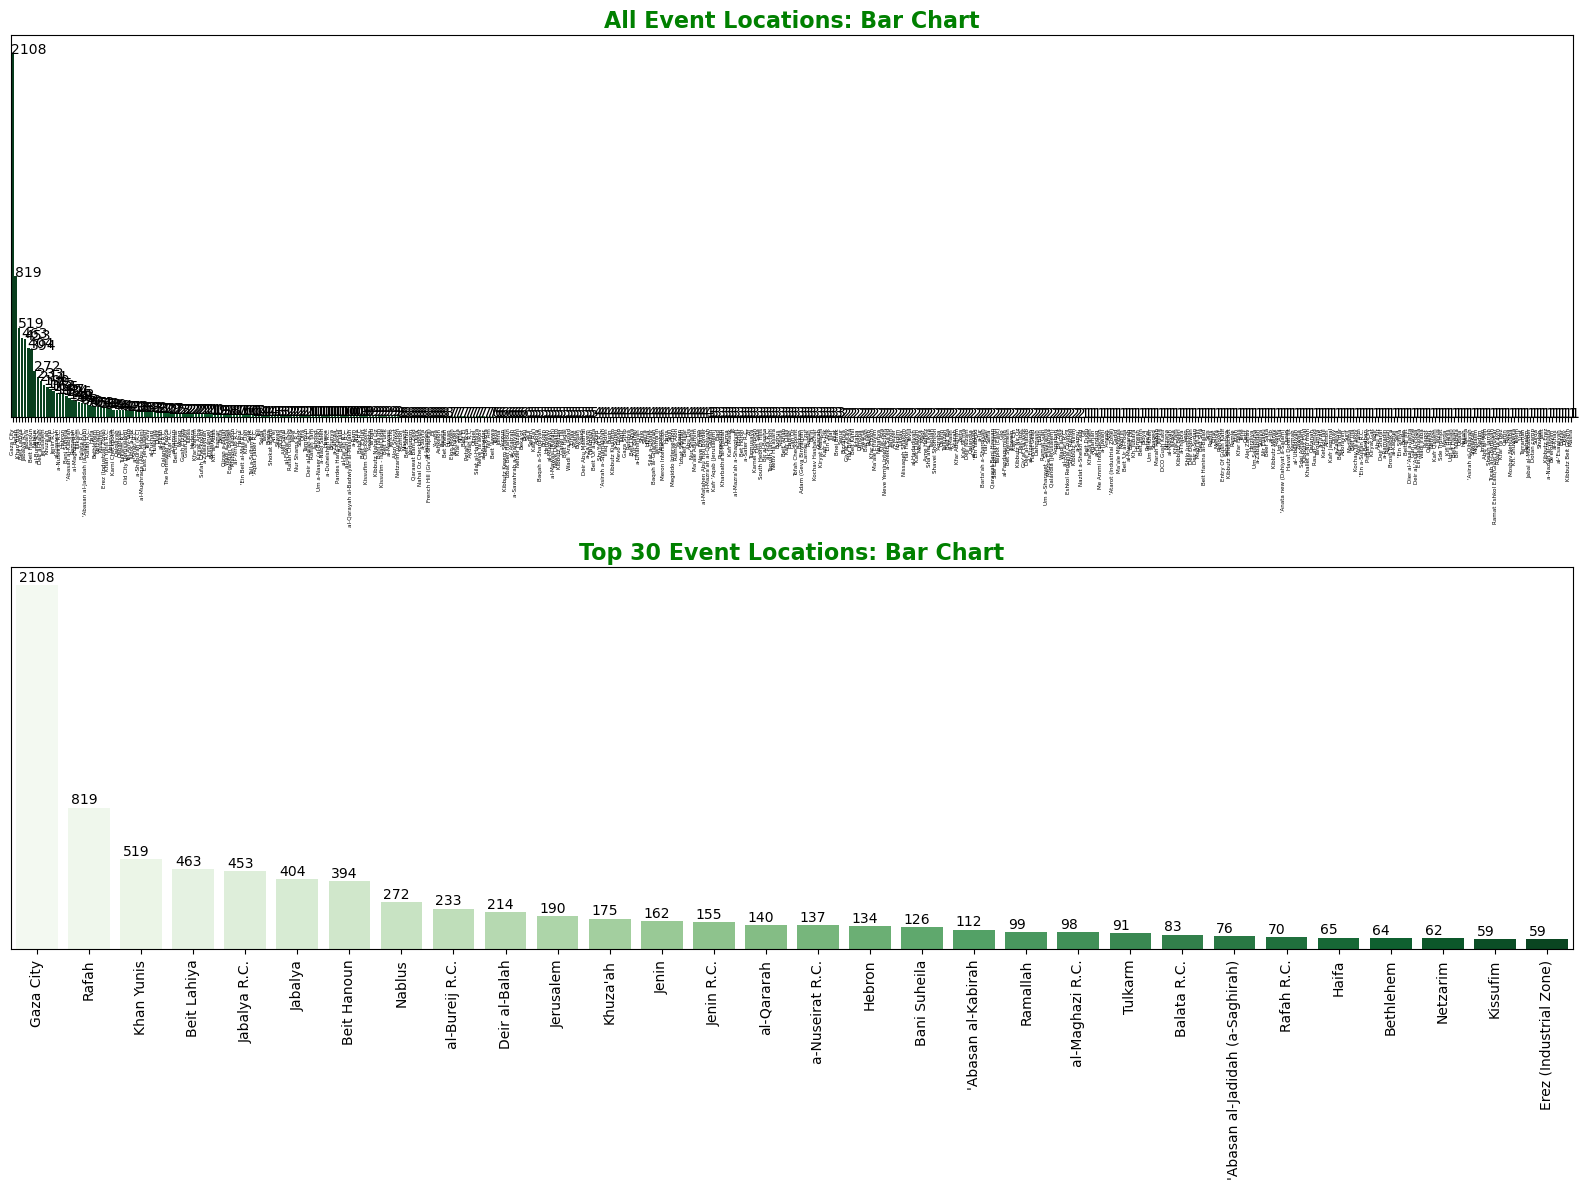

In [54]:
# Create a figure with 2 subplots in a single column
fig, axes = plt.subplots(2, 1, figsize=(16, 12))

# --- Subplot 1: Bar Chart of All Event Locations ---
axes[0].set_title('All Event Locations: Bar Chart', 
                  color='green', weight='bold', fontsize=16)

ax = sns.countplot(x=df['event_location'], 
                   palette='Greens_r', alpha=1, 
                   order=df['event_location'].value_counts().index, 
                   ax=axes[0])  # Pass the axes object

# Add the count numbers on top of each bar
for p in ax.patches:
    axes[0].annotate('{:.0f}'.format(p.get_height()), 
                     (p.get_x() + 0.05, p.get_height() + 3))

# Customize the x-axis ticks
axes[0].tick_params(axis='x', rotation=90, labelsize=4)

# Remove y-axis label and ticks, and x-axis label for cleaner look
axes[0].set(ylabel=None, xlabel=None, yticks=[])

# --- Subplot 2: Bar Chart of Top 30 Event Locations ---
axes[1].set_title('Top 30 Event Locations: Bar Chart', 
                  color='green', weight='bold', fontsize=16)

ax = sns.countplot(x=df['event_location'], 
                   palette='Greens', alpha=1, 
                   order=df['event_location'].value_counts().head(30).index, 
                   ax=axes[1])  # Pass the axes object

for p in ax.patches:
    axes[1].annotate('{:.0f}'.format(p.get_height()), 
                     (p.get_x() + 0.05, p.get_height() + 25))

# Customize the x-axis ticks
axes[1].tick_params(axis='x', rotation=90)

axes[1].set(ylabel=None, xlabel=None, yticks=[])

# --- Show the plots ---
plt.tight_layout()  # Adjust layout to not overlap
plt.show()

**Insights**

- Kota Gaza merupakan lokasi yang paling terdampak. Sebagian besar korban jiwa terjadi di sana.
- Rafah, Khan Yunis, Jabalya R.C., dan Beit Lahiya adalah lokasi kejadian lainnya.

**BONUS**

In [55]:
import folium
from folium import plugins

In [56]:
## Generate a heat map of event location districts with Folium library
## Define latitude and longitude for the Event location districts in our dataset
## Note: Collected the Lat-Long coordinates manually from website : https://www.gps-coordinates.net/

lat_longs = [
    [31.5050311,34.4641381], #Gaza
    [31.5501268,34.5033134], #North Gaza
    [31.3457612,34.3025277], #Khan Yunis
    [31.2752047,34.2558269], #Rafah
    [31.4183455,34.3502476], #Deir al-Balah
    [31.89096313966111,37.850288931736976], #Israel
    [32.2205316,35.2569374], #Nablus
    [32.4618837,35.297566], #Jenin
    [31.9106212,35.2088129], #Ramallah and al-Bira
    [31.5304303,35.0879406], #Hebron
    [32.3111468,35.0275505], #Tulkarm
    [31.7043556,35.2061876], #Bethlehem
    [31.78336,35.23388], #East Jerusalem
    [31.8912806,35.2003213], #al-Quds
    [31.42507,34.3734], #Gush Katif
    [32.18966,34.97063], #Qalqiliya
    [32.3234392,35.3693661], #Tubas
    [31.855991,35.4598851], #Jericho
    [32.0851611,35.1815442], #Salfit
]

## Setup event location district heat map with folium
event_location_district_heat_map = folium.Map(location= [31.90, 34.80], zoom_start=8)

## Add lat_longs data to folium event location district heat map
event_location_district_heat_map.add_child(plugins.HeatMap(lat_longs, min_opacity=0.6, radius=18))

## Display heat map
event_location_district_heat_map

Dengan melihat peta, Anda dapat mengetahui bahwa Gaza (di sudut kiri bawah) dan Tepi Barat (di bagian timur laut Israel) memiliki jumlah kejadian tertinggi.

The occupying army uses internationally prohibited incendiary bombs (phosphorus bombs) with the aim of exterminating the Palestinian people.¶

In [57]:
# Count the occurrences of each type of ammunition and means of killing
ammunition_counts = df['ammunition'].value_counts()
means_of_killing_counts = df['killed_by'].value_counts()

print("Ammunition used:")
print(ammunition_counts)

print("\nMeans of killing:")
print(means_of_killing_counts)

Ammunition used:
ammunition
Unknown                        5036
missile                        2789
live ammunition                1496
shell                           657
explosive belt                  316
bomb                            241
mortar fire                      50
knife                            37
flechette shells                 22
rubber-coated metal bullets      19
0.22-caliber bullets             16
phosphorus shell                 16
Qassam rocket                    15
car bomb                         15
teargas canister                 13
rocket                           12
grad rocket                       7
sponge rounds                     2
grenade                           2
flare bomb                        1
stun grenade                      1
rock                              1
Name: count, dtype: int64

Means of killing:
killed_by
Israeli security forces    9658
Palestinian civilians      1011
Israeli civilians            95
Name: count, dtype: int64


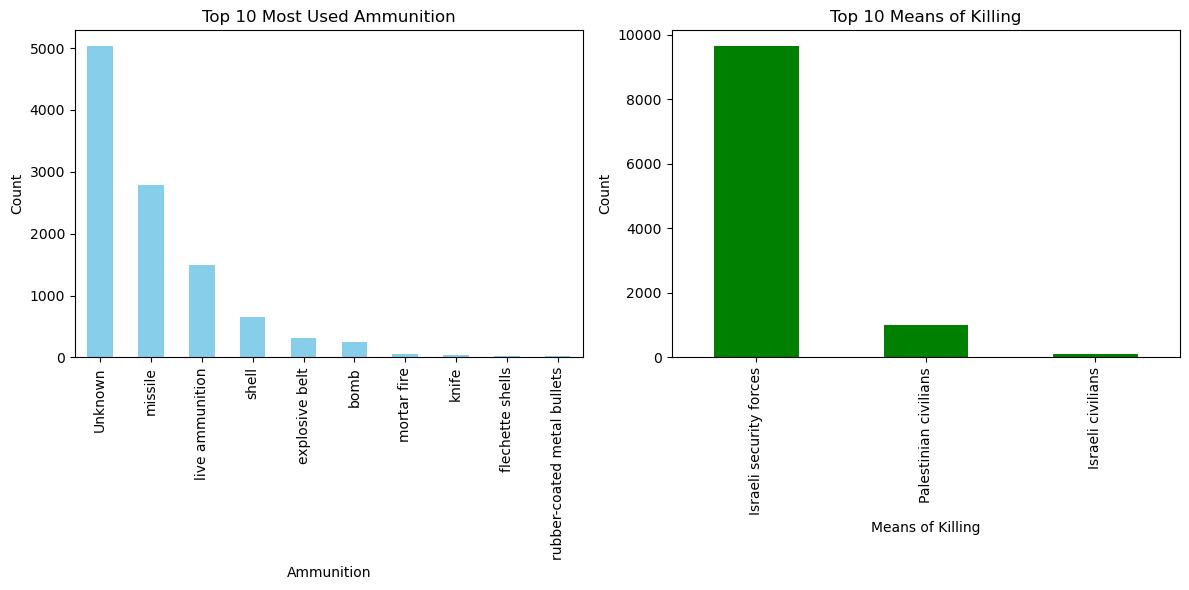

In [58]:
plt.figure(figsize=(12, 6))

# Plot ammunition
plt.subplot(1, 2, 1)
ammunition_counts.head(10).plot(kind='bar', color='skyblue')
plt.title('Top 10 Most Used Ammunition')
plt.xlabel('Ammunition')
plt.ylabel('Count')

# Plot means of killing
plt.subplot(1, 2, 2)
means_of_killing_counts.head(10).plot(kind='bar', color='green')
plt.title('Top 10 Means of Killing')
plt.xlabel('Means of Killing')
plt.ylabel('Count')

plt.tight_layout()
plt.show()